# Student Grades Predict

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Datasets

In [2]:
df=pd.read_csv("Student grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


In these datasets we predict the CGPA of students

In [3]:
# top 10 data in these datsets
df.head(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,...,C,B-,C+,C+,A-,A-,B+,B-,B,3.026
6,CS-97007,B-,C-,A-,D,A-,B,A,B+,A-,...,B-,C,B+,B-,A,A-,B+,B+,A,2.957
7,CS-97008,B+,B+,C+,C,C,A-,C-,A-,B,...,D+,B+,B+,C,A,B+,A-,A-,A-,3.043
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,...,B+,B,B-,C+,A,A-,B+,A-,A,3.358
9,CS-97010,A,B,C+,B,B,A-,C,B-,A-,...,C+,B-,B+,B-,A,A,A-,B,A,3.247


In [4]:
# Last 10 data in these datasets
df.tail(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
561,CS-97562,B-,B,A-,B+,B-,B+,A-,A,B,...,B+,B-,B+,D+,C+,B-,B+,C,C+,2.828
562,CS-97563,B,B,A,C,B,B+,B,C-,B+,...,A-,B,B+,B+,B+,C+,A-,D+,C+,2.821
563,CS-97564,A-,B,A,D+,B+,A-,C,A,C+,...,B+,C,B+,C-,C-,C,F,D,C,2.612
564,CS-97565,A-,D,A,C,B+,B+,C,A-,B-,...,B,C+,B+,D+,C,C-,B,C,B-,2.607
565,CS-97566,F,F,D,C-,NaN,D+,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [5]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
# Now checking the rows and columns in these students datasets
df.shape

(571, 43)

Here you can see that there is 571 rows and 43 columns

In [7]:
print("The dimensions of datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The dimensions of datasets:  (571, 43)
The columns of the datasets:  Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [8]:
# describe the data
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [9]:
# Now we checking null values 
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Here you can see that there is so many columns contains null values

How try to replace the nan value in wright values

In [10]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

Almost “A” grade occurs maximum number of times in all columns. So we replace nan values into "A" .

In [11]:
# Now we repalce all nan values in "A" grades
df.fillna("A", inplace=True)

In [12]:
# Now we checking null values 
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Here we can see that there is no null values present after replacing

<Axes: >

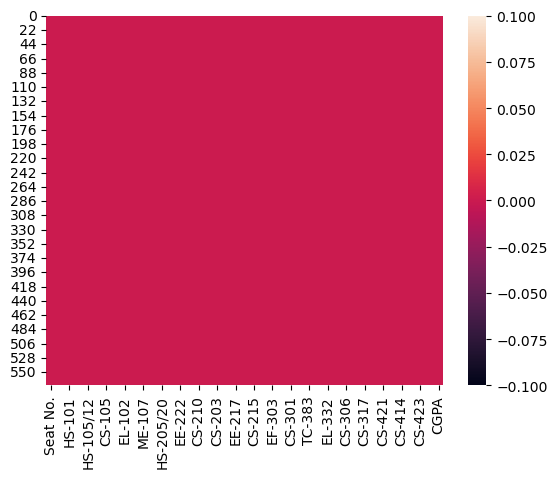

In [13]:
# Lets check the null values using heatmap
sns.heatmap(df.isnull())

In [14]:
# Now checking the datatypes 
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [15]:
# Now separating the categorical columns and numercial columns

# Checking for categorical Coumns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']


Numerical Columns:  ['CGPA']


Now we can see that the 42 columns contains categorical data and one columns contians numerical data

In [16]:
#Checking number of uniques vlaues in each columns
df.nunique().to_frame("No. of unique values")

,No. of unique values
Seat No.,571
PH-121,13
HS-101,12
CY-105,13
HS-105/12,13
MT-111,13
CS-105,11
CS-106,13
EL-102,13
EE-119,12


In [17]:
df["PH-121"].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

In [18]:
df["HS-101"].unique()

array(['D+', 'D', 'B', 'C+', 'A-', 'B-', 'C-', 'B+', 'C', 'A', 'A+', 'F'],
      dtype=object)

In [19]:
df["CY-105"].unique()

array(['C-', 'D+', 'A', 'A-', 'B', 'C+', 'B+', 'B-', 'C', 'D', 'WU', 'A+',
       'F'], dtype=object)

In [20]:
df["CS-301"].unique()

array(['B', 'A-', 'B+', 'D', 'B-', 'D+', 'C', 'C+', 'C-', 'A', 'F', 'A+'],
      dtype=object)

In [21]:
# dropping the Id number columns because these columns contains unique values
df.drop(["Seat No."], axis=1, inplace=True)

In [22]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Data Visualization

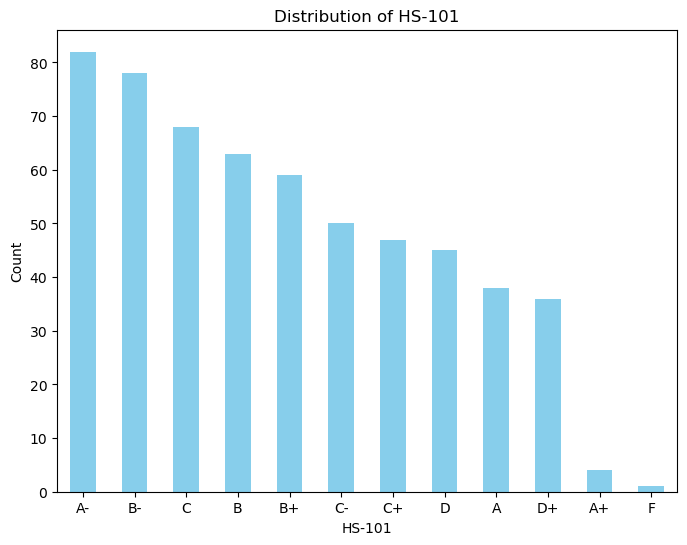

In [23]:
# Plot the distribution
grade_counts = df['HS-101'].value_counts()
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of HS-101')
plt.xlabel('HS-101')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

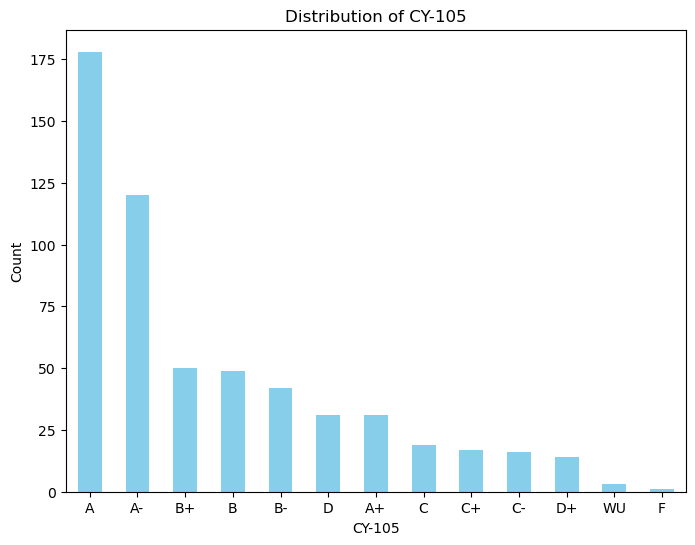

In [24]:
# Plot the distribution
grade_counts = df['CY-105'].value_counts()
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of CY-105')
plt.xlabel('CY-105')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

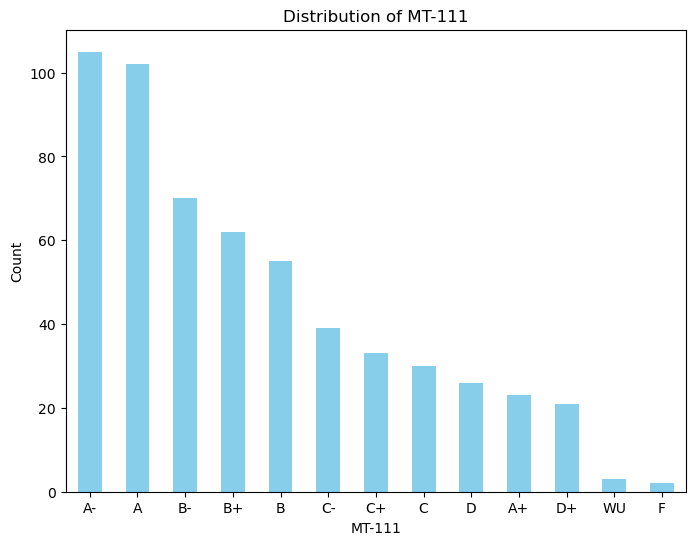

In [25]:
# Plot the distribution
grade_counts = df['MT-111'].value_counts()
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of MT-111')
plt.xlabel('MT-111')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

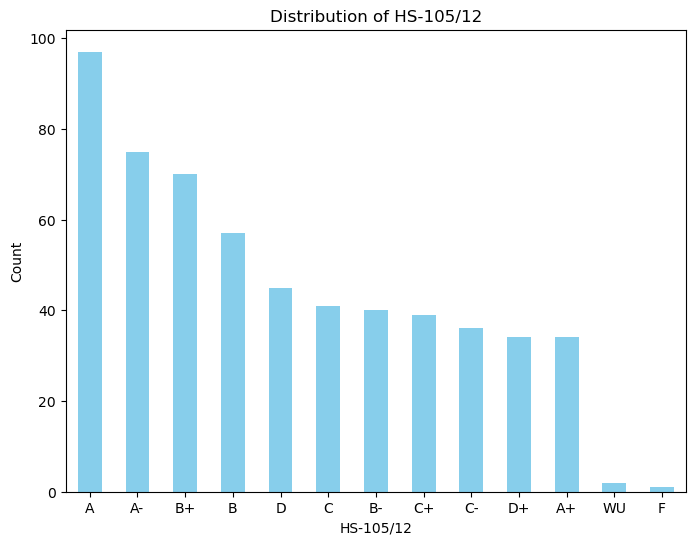

In [26]:
# Plot the distribution
grade_counts = df['HS-105/12'].value_counts()
plt.figure(figsize=(8, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of HS-105/12')
plt.xlabel('HS-105/12')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

A-    105
A      94
B+     69
B      59
B-     53
D      38
C+     35
C-     32
C      30
A+     29
D+     23
WU      3
F       1
Name: EL-102, dtype: int64


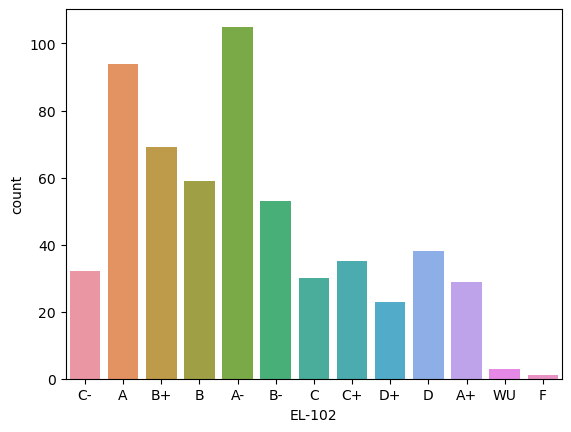

In [27]:
# visualize 
ax=sns.countplot(x='EL-102',data=df)
print(df['EL-102'].value_counts())

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


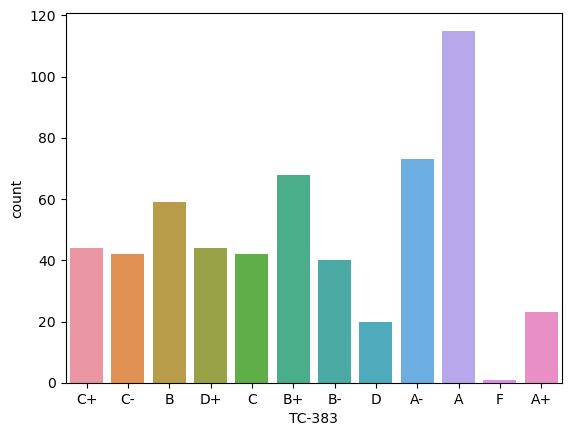

In [28]:
# visualize 
ax=sns.countplot(x='TC-383',data=df)
print(df['TC-383'].value_counts())

A-    120
A      87
B+     65
B      57
B-     49
C-     43
C+     39
D+     37
D      31
C      30
A+     10
WU      1
W       1
F       1
Name: MT-224, dtype: int64


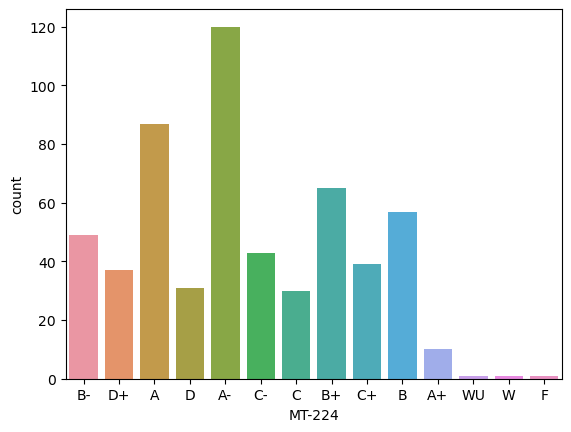

In [29]:
# visualize 
ax=sns.countplot(x='MT-224',data=df)
print(df['MT-224'].value_counts())

A-    128
B      72
B-     70
B+     66
C      58
C+     53
A      38
C-     33
D      20
D+     19
F       6
A+      4
WU      2
W       2
Name: HS-304, dtype: int64


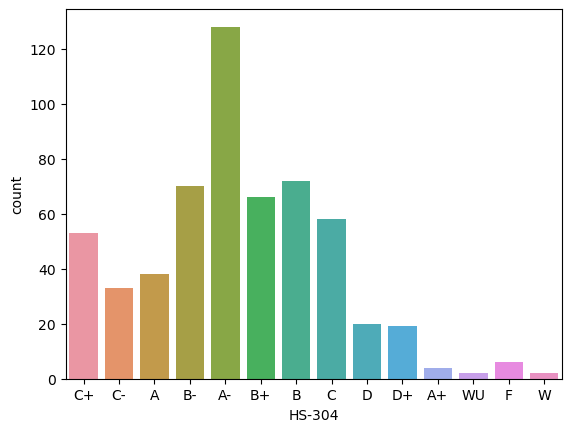

In [30]:
# visualize 
ax=sns.countplot(x='HS-304',data=df)
print(df['HS-304'].value_counts())

A     115
A-     73
B+     68
B      59
C+     44
D+     44
C-     42
C      42
B-     40
A+     23
D      20
F       1
Name: TC-383, dtype: int64


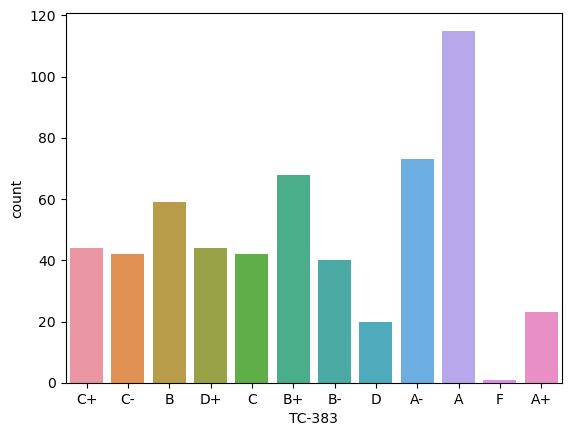

In [31]:
# visualize 
ax=sns.countplot(x='TC-383',data=df)
print(df['TC-383'].value_counts())

A     129
A-    121
B+     65
B      53
C      39
B-     35
A+     32
C+     29
D      25
D+     21
C-     16
F       4
W       2
Name: EE-222, dtype: int64


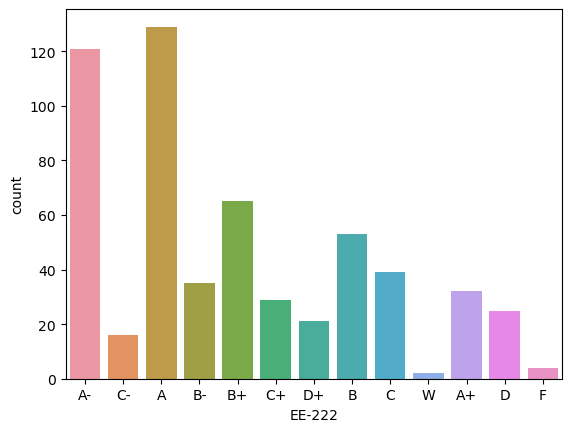

In [32]:
# visualize 
ax=sns.countplot(x='EE-222',data=df)
print(df['EE-222'].value_counts())

# Data Distributed

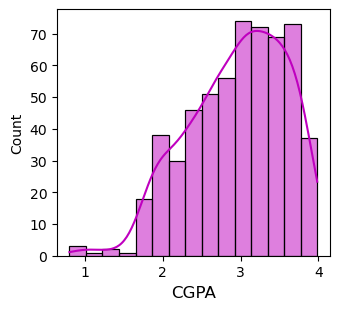

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming numerical_col is a list of column names containing numerical data
numerical_col = df.select_dtypes(include=[np.number]).columns.tolist()

plotnumber = 1  # Initialize subplot number
plt.figure(figsize=(15, 15))  # Set overall figure size to accommodate subplots

# Iterate over numerical columns and plot distributions
for col in numerical_col:
    if plotnumber <= 25:  # Limit the number of subplots to 25 (5x5 grid)
        plt.subplot(5, 5, plotnumber)
        sns.histplot(df[col], kde=True, color="m")  # Use sns.histplot instead of sns.distplot
        plt.xlabel(col, fontsize=12)
        plotnumber += 1  # Increment plotnumber for the next subplot
    else:
        break  # Exit loop if plotnumber exceeds the maximum number of subplots

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()  # Display the figure with subplots

# Now Checking the outliers

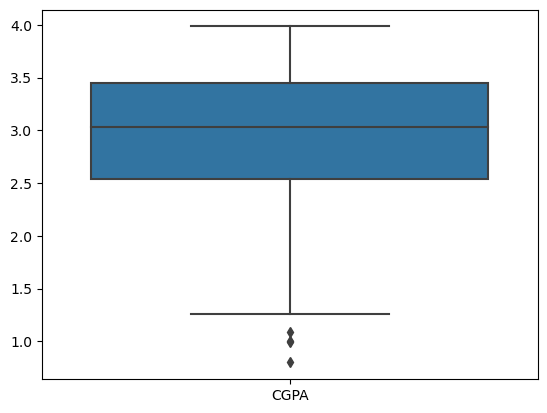

In [34]:
# Creating a box plot
sns.boxplot(data=df)
plt.show()

Here you can see that in CGPA columns some outliers but this is my target variable so that why we no need to remove because when we removed the CGPA outliers then the values also changes

# Now Checking Skewness

In [35]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
OE = OrdinalEncoder()

# Dictionary to store mappings for each categorical column
mappings = {}

# Encoding categorical columns
for col in df.columns:
    if df[col].dtypes == "object":
        original_values = df[col].unique()
        df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
        encoded_values = OE.transform(original_values.reshape(-1, 1)).flatten()
        mappings[col] = dict(zip(original_values, encoded_values))

print("Encoded DataFrame:\n", df)
print("\nMappings for each column:")
for col, mapping in mappings.items():
    print(f"{col} mapping:", mapping)

Encoded DataFrame:
      PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0       5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0   
1       0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0   
2       0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0   
3       9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0   
4       2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566     3.0     0.0     0.0        2.0     1.0     0.0     2.0     2.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     0.0     2.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0     9.0    10.0     5.0     8.0   
570     6.0     9.0     9.0        6.0     6.0    10.0     3.0     7.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       5.0    

Label mapping: {'A': 0, 'A+': 1, 'A-': 2, 'B': 3, 'B+': 4, 'B-': 5, 'C': 6, 'C+': 7, 'C-': 8, 'D': 9, 'D+': 10, 'F': 11, 'WU': 12}
Reverse mapping: {0: 'A', 1: 'A+', 2: 'A-', 3: 'B', 4: 'B+', 5: 'B-', 6: 'C', 7: 'C+', 8: 'C-', 9: 'D', 10: 'D+', 11: 'F', 12: 'WU'}

In [36]:
# Now cheking skewness
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.481801
CS-105       0.930769
CS-106       0.631537
EL-102       0.497878
EE-119       0.568220
ME-107       0.104369
CS-107       0.414846
HS-205/20    0.886061
MT-222       0.186063
EE-222       0.759105
MT-224       0.416932
CS-210       0.709664
CS-211       0.105522
CS-203       0.264868
CS-214       0.027368
EE-217       0.712366
CS-212       0.388493
CS-215       0.150606
MT-331       0.627721
EF-303       0.327013
HS-304       0.488848
CS-301       0.387714
CS-302       0.575208
TC-383       0.331652
MT-442       0.861796
EL-332       0.438171
CS-318       0.319306
CS-306       0.403422
CS-312       0.433329
CS-317       0.134402
CS-403       0.618339
CS-421       0.095838
CS-406       1.325117
CS-414       1.292931
CS-419       0.449645
CS-423       0.491935
CS-412       1.117774
CGPA        -0.497203
dtype: float64

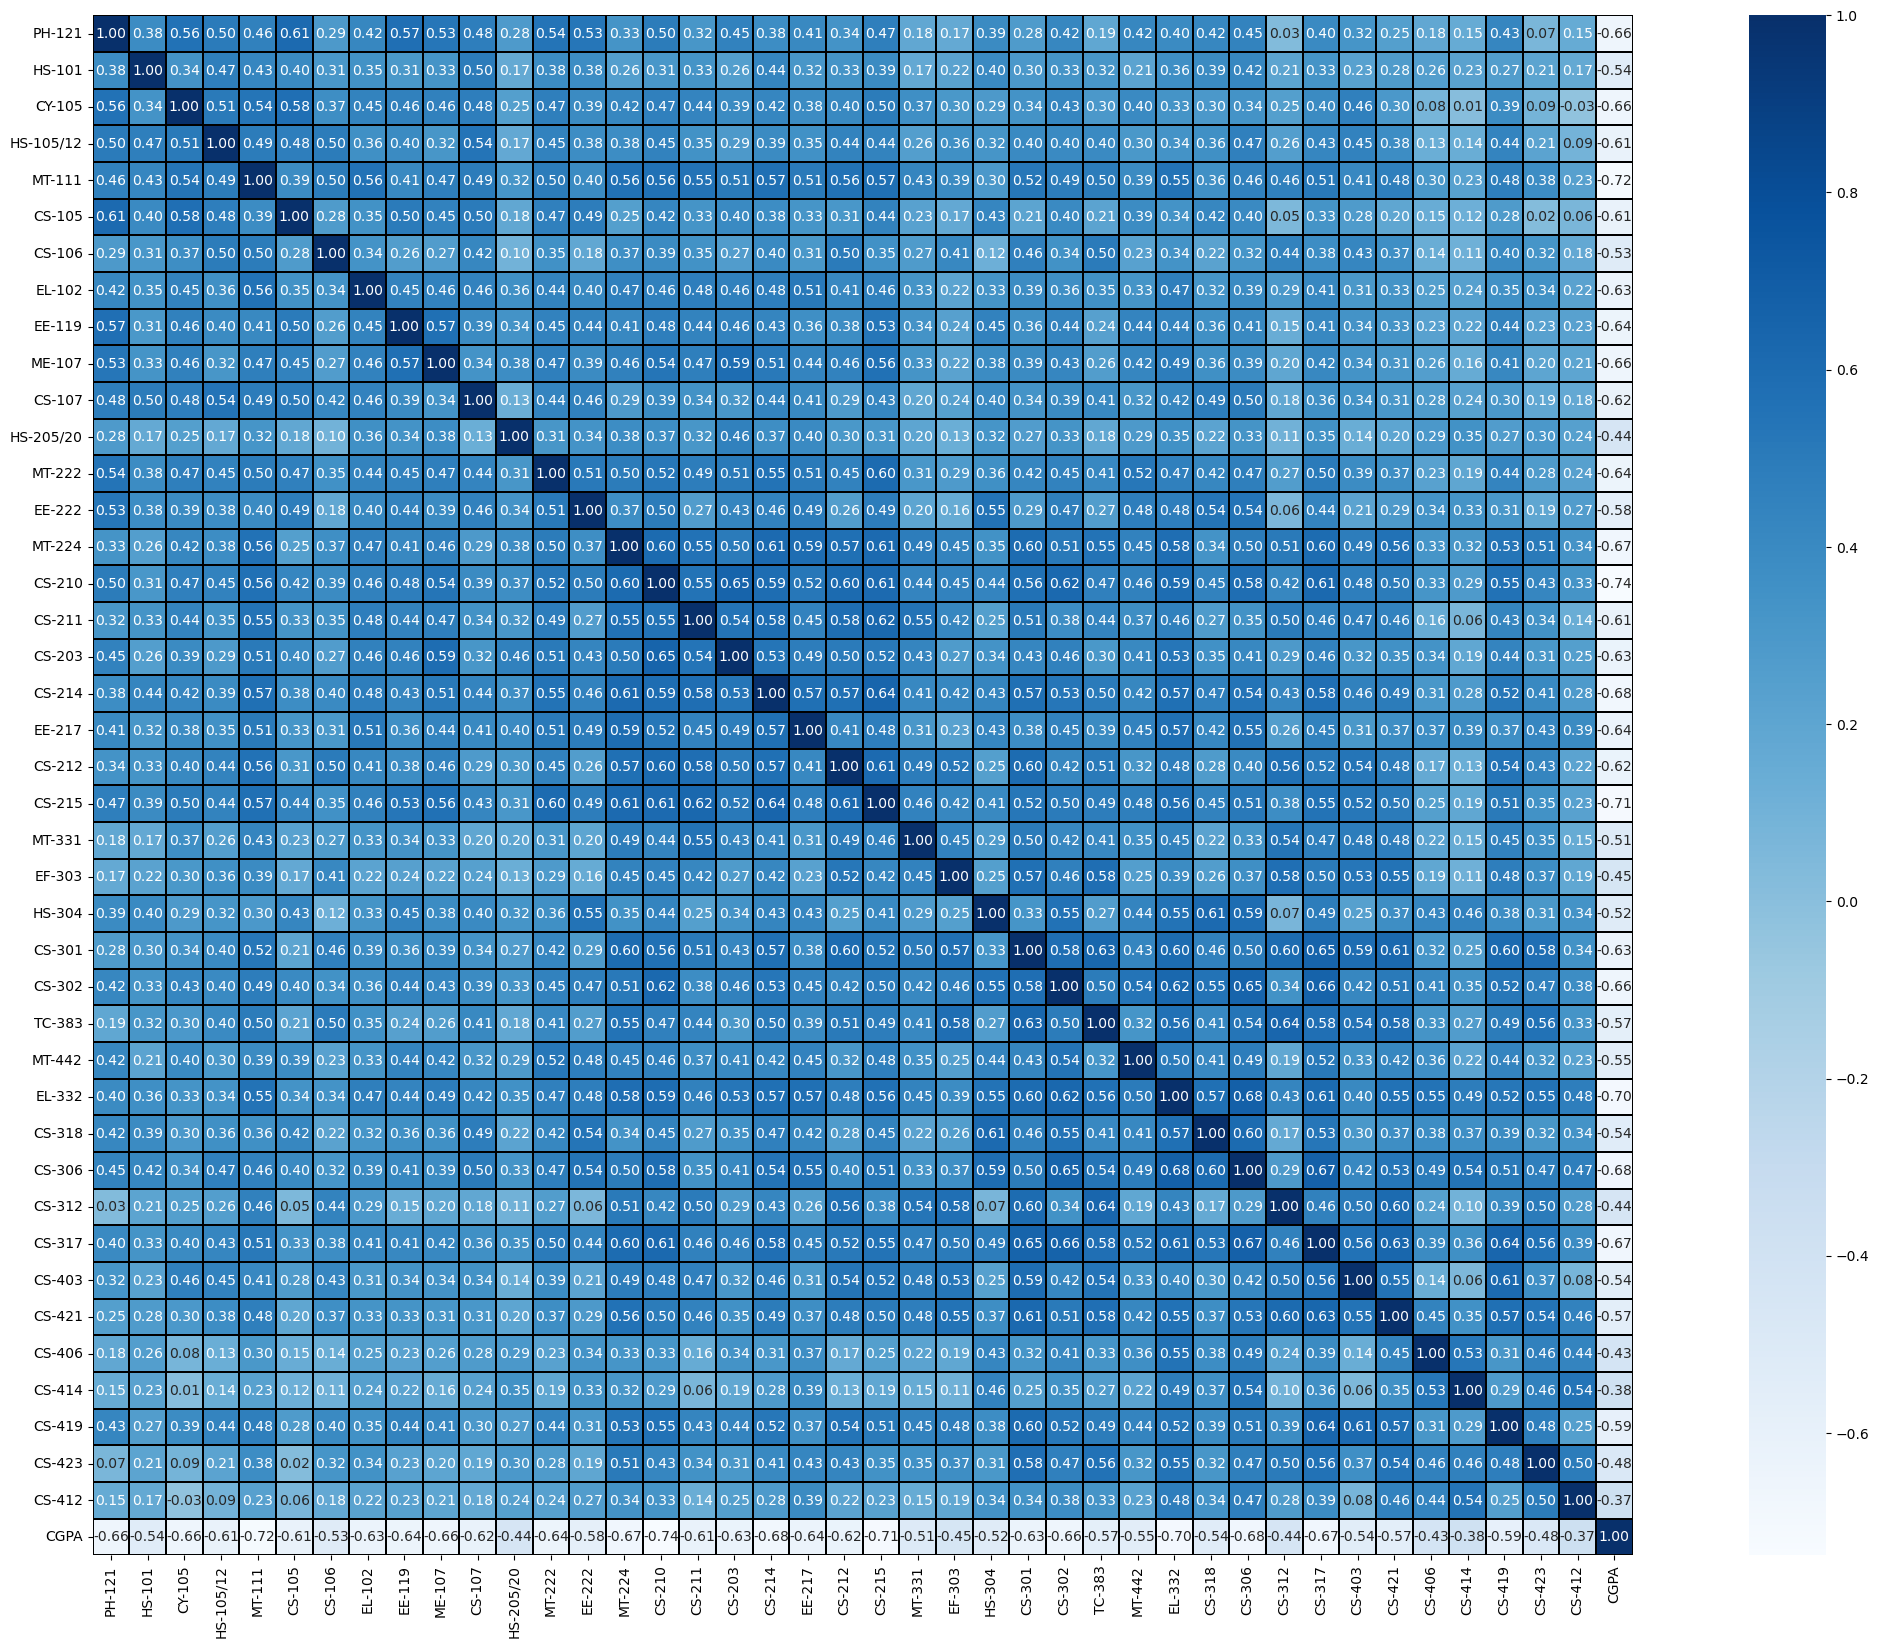

In [37]:
# Set the figure size
plt.figure(figsize=(30,20))

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f',         # Format of annotations (2 decimal places)
            square=True)       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


Here we can see that also no need to change skewness

# Checking how the data is distributed in each columns

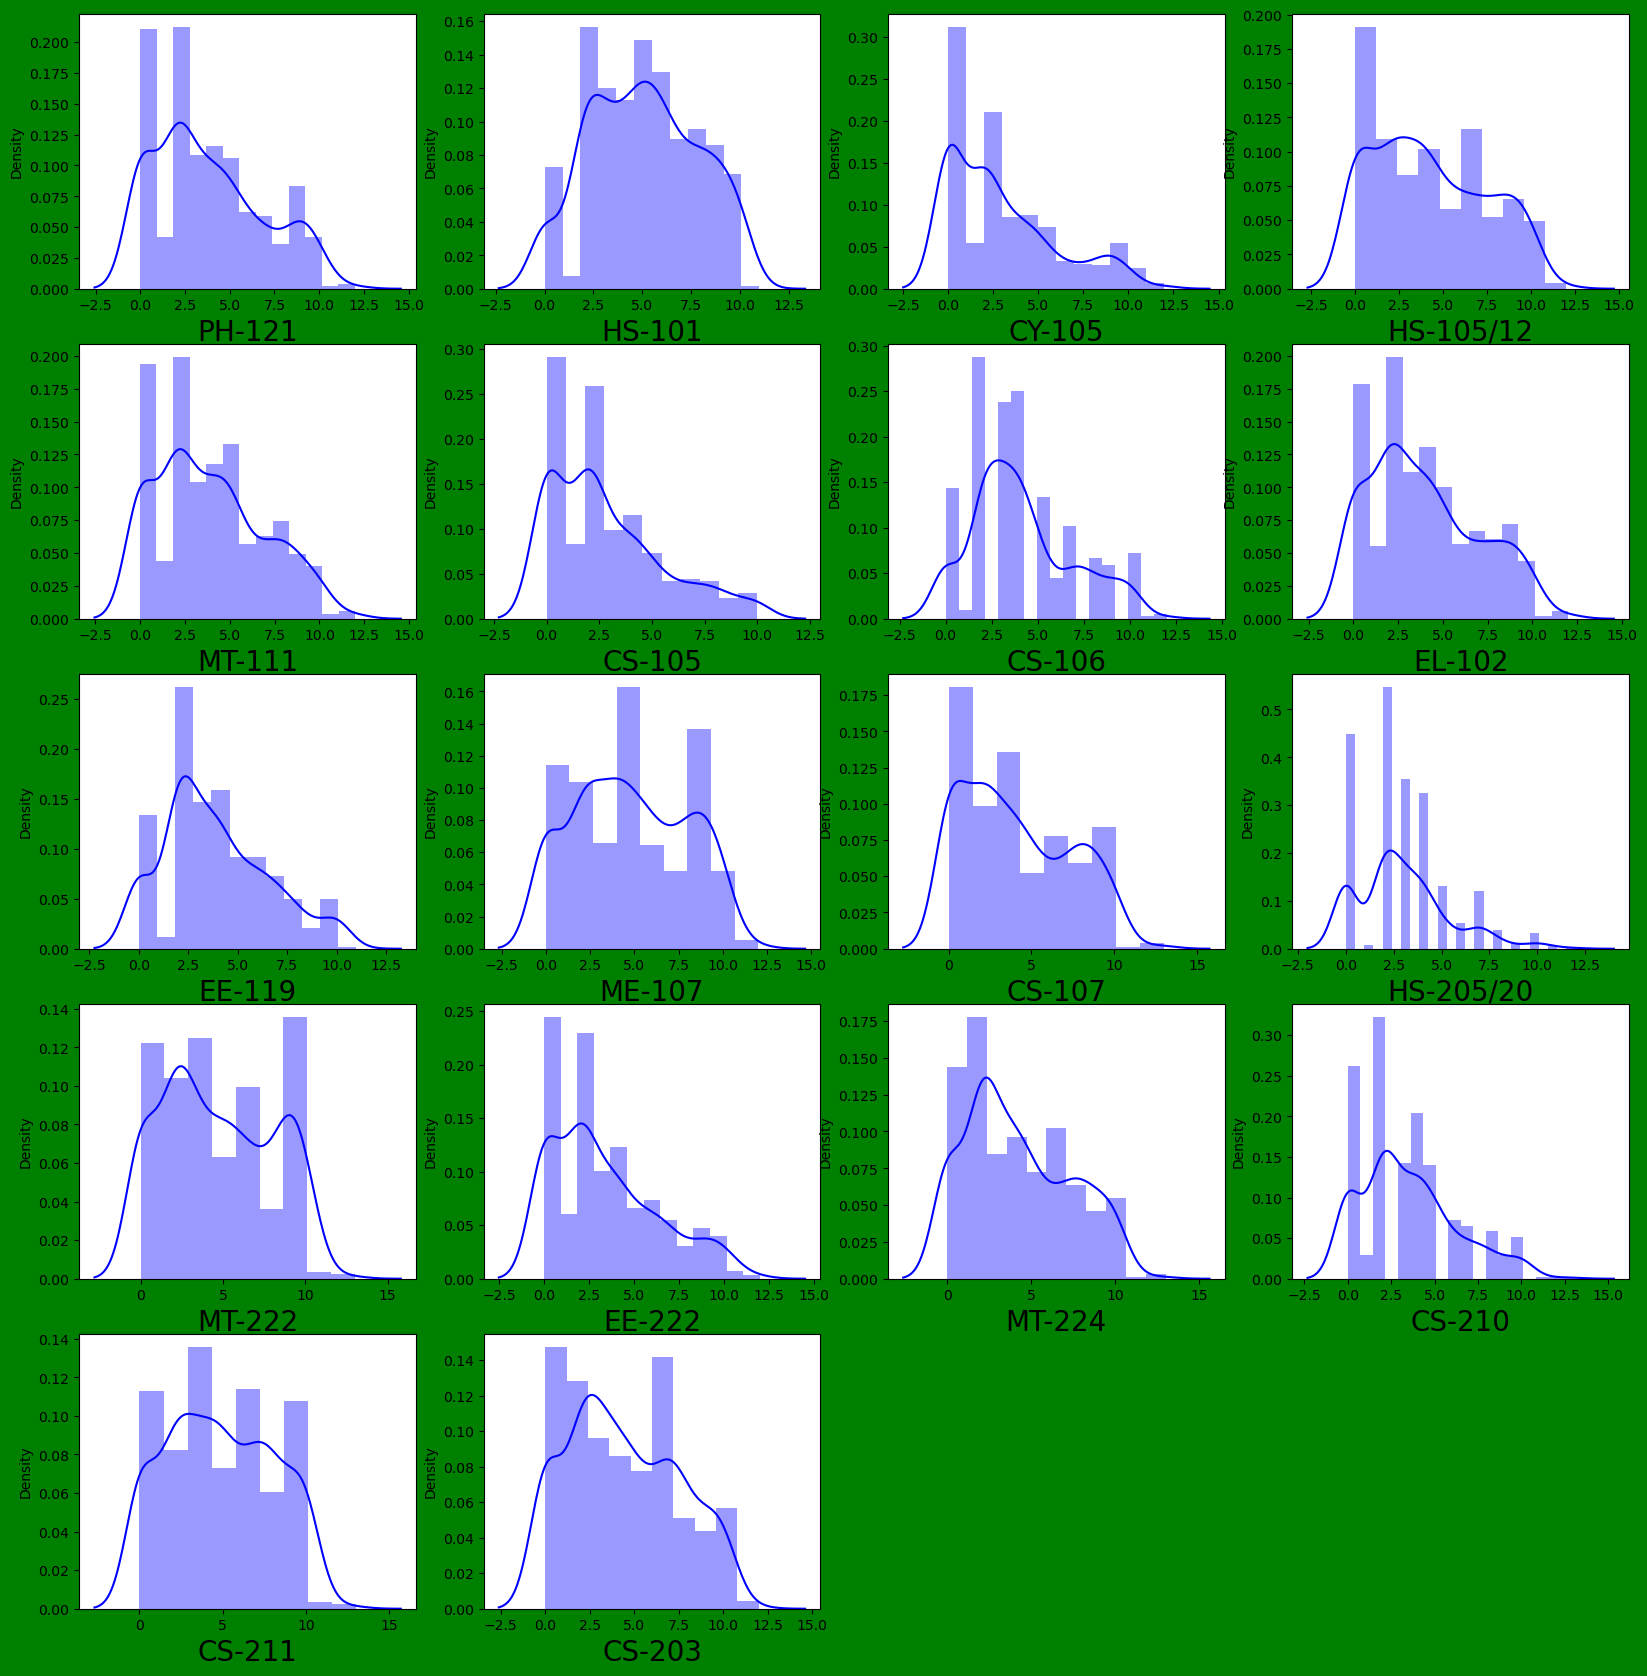

In [38]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Split the target Features

In [39]:
# Separating the independent and target varaible into x and y
x = df.drop("CGPA", axis = 1)
y = df["CGPA"]
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (571, 41)
Label Dimensions (571,)


In [40]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


In [41]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

# Find the best model

In [42]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [43]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    
    # Initializing and training the GradientBoostingRegressor
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i

# Best Accuracy and Random State

In [44]:
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.9657035502671475 on Random_State 20


# Creating Train test split

In [45]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=20)

# Import Model

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# LinearRegression

In [47]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.9247886770543621
R2_Score on training Data:  89.2135812279592
Mean Absolute error:- 0.13158345217997502
Mean Squared error:- 0.031995794191678396
Root Mean Squared Error:- 0.1788736822220597


# RandomForestRegressor

In [48]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.9480109967068385
R2_Score on training Data:  97.93648650724916
Mean Absolute error:- 0.110288895348837
Mean Squared error:- 0.022116742326162727
Root Mean Squared Error:- 0.14871698734900035


# KNN

In [49]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.9282560189407331
R2_Score on training Data:  89.33469966119438
Mean Absolute error:- 0.10129767441860466
Mean Squared error:- 0.03052074558139535
Root Mean Squared Error:- 0.17470187629615017


# GradientBoostingRegressor

In [50]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.9659200329879185
R2_Score on training Data:  99.70959986654938
Mean Absolute error:- 0.08769978292034239
Mean Squared error:- 0.014498024604166217
Root Mean Squared Error:- 0.12040774312379672


# Ridge

In [51]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge = rd.predict(x_test)
pred_train = rd.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_ridge))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared error:-",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_Score:  0.9248358862967798
R2_Score on training Data:  89.21357882262025
Mean Absolute error:- 0.13153140141966901
Mean Squared error:- 0.031975710816660036
Root Mean Squared Error:- 0.17881753498094094


# Decision Tree Regressor

In [52]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.845922718557361
R2_Score on training Data:  100.0
Mean Absolute error:- 0.18961627906976747
Mean Squared error:- 0.06554631395348838
Root Mean Squared Error:- 0.2560201436478942


# Support Vector Regressor

In [53]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_svr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.9399642490968321
R2_Score on training Data:  96.30260169629345
Mean Absolute error:- 0.09350233016465596
Mean Squared error:- 0.02553992477208562
Root Mean Squared Error:- 0.1598121546444


# Extra Trees Regressor

In [54]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9585132789485312
R2_Score on training Data:  100.0
Mean Absolute error:- 0.10010534883720922
Mean Squared error:- 0.017648946148837188
Root Mean Squared Error:- 0.1328493362754861


As we analyze in these datasets the gradient booster regressor is my best model

# Hyper Parameter Tuning

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [56]:
# Train the model with the best parameters
best_gbr = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=20
)

In [57]:
best_gbr.fit(x_train,y_train)
pred = best_gbr.predict(x_test)
print("R2_Score: ",r2_score(y_test,pred))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred))
print("Mean Squared error:-",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.9687152252734694
R2_Score on training Data:  100.0
Mean Absolute error:- 0.08657747699952559
Mean Squared error:- 0.01330891645406363
Root Mean Squared Error:- 0.11536427720080263


Here we can see that there is 98% accuracy

# Saving the model using Joblib

In [58]:
# Saving the model
import joblib
joblib.dump(best_gbr,"Student_grade.pkl")

['Student_grade.pkl']

In [59]:
import pickle
filename = "Student_grade.pkl"
pickle.dump(best_gbr, open(filename,'wb'))  #Saved model

# Predicted the saved model

In [60]:
load_model = pickle.load(open("Student_grade.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

96.87152252734694


# Conclusion

In [61]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
Predicted,1.783604,3.19188,3.536701,3.620173,3.399588,3.041168,3.550328,2.863798,3.11906,2.753163,...,2.58419,2.168797,1.395282,3.857066,3.291833,3.763427,3.324864,3.751059,2.559991,3.420158
Original,1.380000,3.14900,3.443000,3.672000,3.425000,2.860000,3.645000,2.687000,3.10600,2.603000,...,2.55700,2.003000,1.092000,3.919000,3.325000,3.736000,3.404000,3.897000,2.388000,3.440000


In [62]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


 {'A': 0, 'A+': 1, 'A-': 2, 'B': 3, 'B+': 4, 'B-': 5, 'C': 6, 'C+': 7, 'C-': 8, 'D': 9, 'D+': 10, 'F': 11, 'WU': 12}

This values we used 

# Predict the CGPA and make the best diagram

In [64]:
import numpy as np

# Define the mapping dictionary
grade_mapping = {'A': 0, 'A+': 1, 'A-': 2, 'B': 3, 'B+': 4, 'B-': 5, 'C': 6, 'C+': 7, 'C-': 8, 'D': 9, 'D+': 10, 'F': 11, 'WU': 12}

# Define the input data (GRADE characteristics)
input_data_grades = [
    'D','C+','D+','D','D','A-','D+','C-','D','C+','D','B','D+','B-','D','C','B+','C+','D',
    'D+','D','D','D+','D','B-','D','B-','D+','C-','D+','B+','C-','D+','C','D+','C-','B-','B','C+','C+','C+'
]

# Convert the input data grades to their numerical equivalents
input_data_numerical = np.array([grade_mapping[grade] for grade in input_data_grades]).reshape(1, -1)

# Load your trained SVR model (assuming it's already loaded as 'Model')
# For demonstration, we assume 'Model' is a placeholder for your actual SVR model
# Model = your_trained_model

# Make prediction using the trained SVR model
prediction = best_gbr.predict(input_data_numerical)  # Use 'svr' for prediction

# Print the input data and predicted CGPA
print("Input Data (Numerical):", input_data_numerical)
print("Predicted CGPA:", prediction)

Input Data (Numerical): [[ 9  7 10  9  9  2 10  8  9  7  9  3 10  5  9  6  4  7  9 10  9  9 10  9
   5  9  5 10  8 10  4  8 10  6 10  8  5  3  7  7  7]]
Predicted CGPA: [1.92721349]


This is my Overall Prediction

# THANK YOU